### k-최근접 이웃회귀의 한계
- 데이터 범위 밖의 새로운 데이터는 예측이 불가능하다는 것이다.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state = 42)

In [4]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [6]:
# K-최근접 이웃 회귀 알고리즘(이웃수 = 3)
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors = 3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [7]:
# 길이가 50cm인 생선의 무게 예측
knr.predict([[50]])

array([1033.33333333])

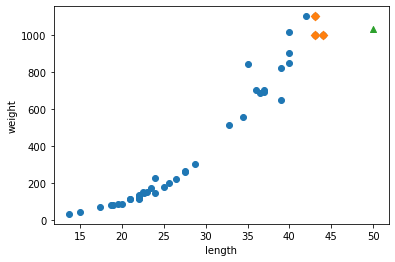

In [9]:
# 길이가 50cm인 생선의 주변 이웃들을 살펴보자
distances, indexs = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexs], train_target[indexs], marker='D')
plt.scatter(50, 1033, marker = '^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

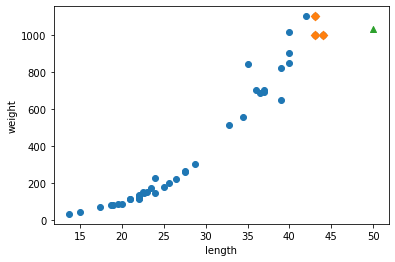

In [10]:
# 길이가 50cm인 생선의 주변 이웃들을 살펴보자
distances, indexs = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexs], train_target[indexs], marker='D')
plt.scatter(50, 1033, marker = '^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## LinearRegression 알고리즘


In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

#모델학습
lr.fit(train_input, train_target)

LinearRegression()

In [12]:
lr.predict([[50]])

array([1241.83860323])

In [13]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


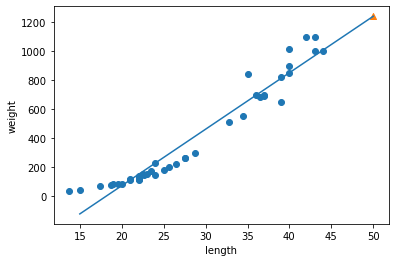

In [14]:
plt.scatter(train_input, train_target)

# 15~ 50 길이의 직선
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [15]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


## 다항회귀

In [16]:
# 2차 방정식 그래프를 그리기 위해 길이를 제곱한 항을 추가하는 작업을 진행해야 한다.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [17]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [19]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [20]:
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [21]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


- 무게 = 1.01 * 길이<sup>2<sup> + -21.6 * 길이 + 116.05

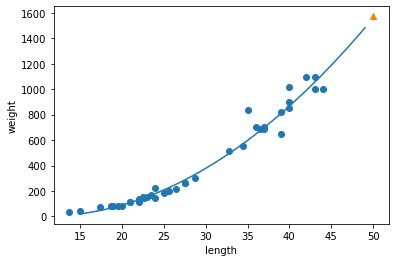

In [23]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

# 15~ 50 길이의 직선
plt.plot(point, 1.01*point**2-21.6*point+116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


## 특성공학과 규제

## 다중회귀(Multiple Regression)
- 여러 개의 특성을 사용한 선형 회귀 알고리즘
- 특성공학 : 기존의 특성을 사용해 새로운 특성을 뽑아내는 것을 말한다.

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv\
')

In [27]:
raw = df.to_numpy()

In [29]:
# 생선의 길이, 높이, 두께를 이용한 회귀분석
raw

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [30]:
# target data
weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

## 훈련 세트와 테스트 세트로 분리

In [31]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    raw, weight, random_state=42)

## 사이킷런 변환기

In [34]:
# 다항식 변환기
from sklearn.preprocessing import PolynomialFeatures
# polynomialFeatures :현재 데이터를 다항식의 형태로 변경하는 역할을 수행

In [36]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[1., 2., 3., 4., 6., 9.]])

- 무게 = a*길이 + b*높이 + c*두께 + 1

In [38]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [39]:
# 컬럼명 추출
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [40]:
test_poly = poly.transform(test_input)

## 다중 회귀 모델

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [44]:
lr.score(train_poly, train_target)

0.9903183436982125

In [45]:
lr.score(test_poly, test_target)

0.9714559911594155

In [47]:
poly = PolynomialFeatures(degree=5,include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [48]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999938143

In [49]:
lr.score(test_poly, test_target)

-144.40744532797535

- 과대적합이 발생한다.

- 규제 : 머신런닝 모델이 훈련세트를 너무 과도하게 학습하지 못하도록 훼방하는 것
- 모델이 훈련세트에 과대적합되지 않도록 만드는 것
- 선형 회귀 모델의 경우 특성에 곱해지는 계수(또는 기울기)의 크기를 작게 만드는 일이다.


In [57]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지회귀

In [58]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [59]:
print(ridge.score(test_scaled, test_target))

0.9790693977615386


- 릿지 회귀(Ridge Regression)모델 : 계수를 제곱한 값을 기준으로 규제 적용
- 라쏘 회귀(Lasso Regression)모델 : 계수의 절대값을 기준으로 규제 적용
- 두 알고리즘 모두 계수의 크기를 줄이지만 라소는 아예 0으로 만들 수도 있어서 일반적으로 릿지를 조금 더 선호한다.
- alpha : 릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절하는 하이퍼파라미터
- alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도한다.
- alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합 될 가능성이 크다.
- 하이퍼파라미터(Hyperparameter) : 머신런닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터

In [60]:
# 훈련세트와 테스트세트의 점수가 가장 가까운 지점이 최적의 alpha값이 된다.
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    #릿지모델
    ridge = Ridge(alpha=alpha)
    # 릿지모델 훈련
    ridge.fit(train_scaled, train_target)
    # 결정계수(R2 score)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Anaconda3\lib\site-pack

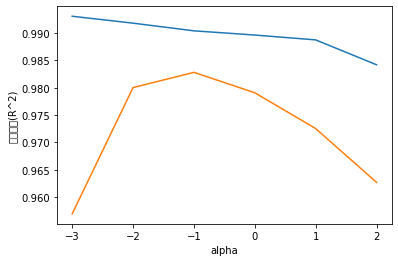

In [61]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('결정계수(R^2)')
plt.show()

- 적절한 alpha 값은 두 그래프가 가장 가깝고 테스트세트의 점수가 가장 높은 지점 -1, ^ = 0.1

In [63]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386896


### 라쏘 회귀

In [64]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386896


In [65]:
np.sum(lasso.coef_ == 0)

42

## 실습문제 : 보스턴 집값 예측

In [70]:
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [71]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [74]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [75]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [76]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [77]:
df = pd.DataFrame(boston['data'], columns= boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [78]:
X = df
y = data['target']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [81]:
L_model = LinearRegression()
L_model.fit(X_train, y_train)

LinearRegression()

In [82]:
result = cross_val_score(L_model, X_train, y_train, cv = 5)
result.mean()

0.7196296397316823

In [83]:
extended_X_train = X_train.copy()
len(X_train.columns)

13

In [85]:
for i in X_train.columns:
    for j in X_train.columns: #13의 제곱인 169번 반복
        extended_X_train[i+'*'+j] = X_train[i]*X_train[j]
extended_X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTAT*CHAS,LSTAT*NOX,LSTAT*RM,LSTAT*AGE,LSTAT*DIS,LSTAT*RAD,LSTAT*TAX,LSTAT*PTRATIO,LSTAT*B,LSTAT*LSTAT
268,0.54050,20.0,3.97,0.0,0.575,7.470,52.6,2.8720,5.0,264.0,...,0.0,1.81700,23.60520,166.216,9.075520,15.80,834.24,41.080,1233.3480,9.9856
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,...,0.0,1.84896,28.49040,94.176,23.332752,12.96,1088.64,79.056,1709.1216,18.6624
375,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,...,0.0,9.01824,98.28672,1315.776,17.691072,322.56,8951.04,271.488,5334.3360,180.6336
425,15.86030,0.0,18.10,0.0,0.679,5.896,95.4,1.9096,24.0,666.0,...,0.0,16.56081,143.80344,2326.806,46.575144,585.36,16243.74,492.678,187.3152,594.8721
244,0.20608,22.0,5.86,0.0,0.431,5.593,76.5,7.9549,7.0,330.0,...,0.0,5.38750,69.91250,956.250,99.436250,87.50,4125.00,238.750,4656.1250,156.2500


In [86]:
L_model2 = LinearRegression()
L_model2.fit(extended_X_train, y_train)

LinearRegression()

In [87]:
result2 = cross_val_score(L_model2,extended_X_train,y_train,cv=5)
result.mean()

0.7196296397316823

In [88]:
extended_X_test = X_test.copy()

In [89]:
for i in X_test.columns:
    for j in X_test.columns: #13의 제곱인 169번 반복
        extended_X_test[i+'*'+j] = X_test[i]*X_test[j]

C:\Users\admin\AppData\Local\Temp/ipykernel_7140/2408296685.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  extended_X_test[i+'*'+j] = X_test[i]*X_test[j]


In [90]:
L_model2.score(extended_X_test, y_test)

0.7585637485314308

In [91]:
from sklearn.linear_model import Ridge
R_model = Ridge()
R_model.fit(extended_X_train, y_train)

Ridge()

In [92]:
R_model.score(extended_X_test,y_test)

0.8170296453381232

In [93]:
from sklearn.linear_model import Lasso

In [94]:
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000]

r_c_list=[]
l_c_list=[]

for i in alpha_list:
    R_model = Ridge(alpha=i)
    L_model = Lasso(alpha=i)
    
    R_model.fit(extended_X_train,y_train)
    L_model.fit(extended_X_train,y_train)
    
    r_c_list.append(R_model.coef_)
    l_c_list.append(L_model.coef_)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.15185e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1160.0487900148041, tolerance: 2.8872986327683616
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1271.459256977859, tolerance: 2.8872986327683616
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1507.0420991706856, tolerance: 2.887

In [95]:
R_df = pd.DataFrame(np.array(r_c_list).T, columns= alpha_list)
R_df

,0.001,0.010,0.100,10.000,100.000,1000.000
0,3.141500,2.768814,1.217381e+00,-0.058021,-0.003875,0.000921
1,-0.168072,-0.191571,-3.879455e-01,-0.482355,-0.256257,-0.043134
2,-6.999827,-7.031477,-6.174583e+00,-0.300497,0.025939,0.007684
3,0.727143,-0.044904,-1.129702e-01,0.002603,-0.006407,-0.001066
4,-19.325238,-1.797106,-5.810657e-02,0.038242,0.007808,0.000966
...,...,...,...,...,...,...
177,-0.024158,-0.024257,-2.470737e-02,-0.020416,-0.014858,-0.011762
178,0.000037,-0.000021,-1.498735e-07,0.000009,-0.000322,-0.000430
179,0.019914,0.019303,1.840944e-02,0.011597,0.012897,0.009793
180,-0.000703,-0.000699,-7.065413e-04,-0.000649,-0.000522,-0.000232


In [96]:
np.array(l_c_list)[0]

array([-8.63979868e-01, -2.68340465e-01, -1.25731664e-01, -0.00000000e+00,
        0.00000000e+00,  1.49015334e+01,  2.65789293e-01, -3.55797893e-01,
       -1.33376977e-01, -1.53121633e-02, -4.52008148e-01,  5.72856019e-02,
        1.94111731e-01,  1.58723759e-03,  1.41390416e-01,  5.88299115e-03,
        6.92976615e-01, -9.18897565e-01,  3.49542673e-02, -5.83377088e-03,
       -1.91322805e-01,  2.68147963e-02,  4.62335993e-04,  1.06213093e-02,
        5.19793312e-04,  1.68886823e-03,  0.00000000e+00,  1.16223191e-04,
        3.42380044e-02, -8.55423559e-02,  2.08451002e-01,  2.07933977e-02,
        1.00860442e-03,  2.34146702e-03, -2.04052626e-02, -4.58983188e-05,
        3.65306012e-03, -1.40633489e-04,  1.91696361e-03,  5.04140324e-03,
       -4.08908564e-02,  7.69142830e-03, -1.00514988e-01, -1.01313282e-01,
       -1.02584509e-01, -1.26220211e-03,  1.63321807e-01, -1.94916333e-02,
        5.51863659e-04, -3.37389688e-02,  2.09273840e-03, -1.61753845e-02,
        1.78796180e+00, -

In [97]:
L_df = pd.DataFrame(np.array(l_c_list).T, columns= alpha_list)
L_df

,0.001,0.010,0.100,10.000,100.000,1000.000
0,-0.863980,-0.759074,0.000000,0.000000,-0.000000,-0.000000
1,-0.268340,-0.246605,-0.102216,-0.000000,-0.000000,0.000000
2,-0.125732,-0.062153,0.000000,-0.000000,-0.000000,-0.000000
3,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
...,...,...,...,...,...,...
177,-0.001478,-0.000333,0.000751,0.000000,-0.000000,-0.000000
178,0.000240,0.000254,0.000404,-0.000527,-0.000000,-0.000007
179,0.030224,0.025913,0.011174,0.000000,0.000000,-0.000000
180,-0.000876,-0.000844,-0.000461,-0.000000,-0.000051,-0.000000


## 실습문제 : 당뇨병 진행도 예측

In [67]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)